### 1. Numpy

In [57]:
import numpy as np

my_array = np.array([[1,2,3],[4,5,6],[7,8,9], [10,11,12]])
# print(2 * my_array)
# print("====")
# print(my_array[3,1])
# print(my_array[1:, 1:])
# print(my_array[1:, 1])
# print("====")
# print(my_array.shape)
# print(my_array[1:, 1:].shape)
# print(my_array[1:, 1].shape)
# print("====")
# print(np.zeros((2,2)))
# print(np.ones((2,2)))
# print(np.full((2,2), 5))
# print(np.random.random((2,2)))
# print(np.eye(2))
print("====")
print(my_array.reshape(2,2,3))
print(my_array.dtype)
np_float_array = np.array([1,2,3], dtype=np.float64)
print(np_float_array.dtype)
np_float_array = np.array([1.1+2.3j, 2.2, 3.6])
print(np_float_array.dtype)


### Vectorsie it for speed ###

====
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
int64
float64
complex128


### 2. Floating point

In [58]:
from decimal import *
import numpy as np
from scipy.constants import c

# print(Decimal('0.1') + Decimal('0.2'))
# np.finfo(np.float64)

beta = (384400e3 / (76 * 3600)) / c
gamma = 1/np.sqrt(1-beta**2)
print(1-np.float32(1/gamma), 1-np.float64(1/gamma), 1 - 1/gamma)


0.0 1.0981660025777273e-11 1.0981660025777273e-11


### 3. Differential Equations

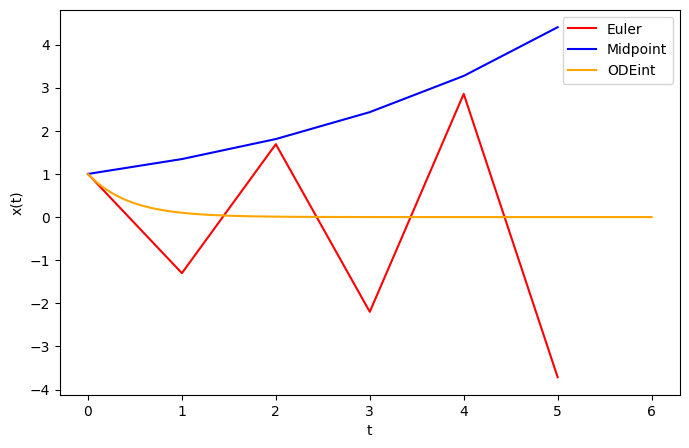

In [100]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import numpy as np

### Parameters ###
h = 1.0
t0 = 0.0
x0 = 1.0
k = -2.3
t = np.arange(t0, 6, h)
t_odeint = np.linspace(t0, 6, 100)
# t = np.linspace(t0, 5, 100)

plt.figure(figsize=(8,5))
class Diff_Eqn():
    def __init__(self, func, t, h, x0):
        self.func = func #ODE function 
        self.h = h # Step size
        self.t = t # Numerical grid, np.arange
        self.x = np.zeros(len(self.t), dtype=np.float32)
        self.x0 = x0
        self.x[0] = self.x0 # Initial condition

    def Euler_method(self):
        for i in range(0, len(self.t)-1):
            self.x[i+1] = self.x[i] + self.h * self.func(t=self.t[i], x=self.x[i])
        # print("printing now")
        # print(self.x)
        # print("returning now")
        return self.x
    
    def Scipy_method(self):
        sol = solve_ivp(fun = self.func, t_span=[self.t[0], self.t[-1]], y0 = [self.x0], t_eval=self.t, method='RK45')
        return sol.y[0]
    
    def Midpoint_method(self):
        for i in range(0, len(self.t)-1):
            k1 = self.h * self.func(t=self.t[i], x=self.x[i])
            k2 = self.h * self.func(t=self.t[i] + self.h/2, x=self.x[i] + k1/2,)
            self.x[i+1] = self.x[i] + k2
        # print("running midpoint")
        return self.x
    
    def ODEint_method(self):
        result_odeint = odeint(self.func, self.x0, self.t, tfirst=True)
        return result_odeint[:,0]

def dx_dt(t, x, k=-2.3):      # Order matters
    # return -2 * x * t
    return k * x

# exact =  np.exp(-t**2)
# exact = np.exp(t) / np.e
# Solver = Diff_Eqn(func = dx_dt, t=t, h=h, x0=x0)
Solver_Euler = Diff_Eqn(func = dx_dt, t=t, h=h, x0=x0)
Solver_Scipy = Diff_Eqn(func = dx_dt, t=t_odeint, h=h, x0=x0)
Solver_Midpoint = Diff_Eqn(func = dx_dt, t=t, h=h, x0=x0)


# # Why does running different methods on the same object modify the original object?
# Euler_method = Solver.Euler_method().copy()
# print(Euler_method)
# Midpoint_method = Solver.Midpoint_method()
# print(Euler_method)
# print(Midpoint_method)

Euler_method = Solver_Euler.Euler_method()
Scipy_method = Solver_Scipy.Scipy_method()
Midpoint_method = Solver_Midpoint.Midpoint_method()
ODEint_method = Solver_Scipy.ODEint_method()


### Plotting ###
plt.plot(t, Euler_method, label='Euler', color = "red")
# plt.plot(t_odeint, Scipy_method, label='Scipy', color = "green")
plt.plot(t, Midpoint_method, label='Midpoint', color = "blue")
plt.plot(t_odeint, ODEint_method, label='ODEint', color = "orange")
# plt.plot(t, exact, label='Exact')

# plt.ylim(0.16,0.17)
# plt.xlim(1.35,1.36)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()



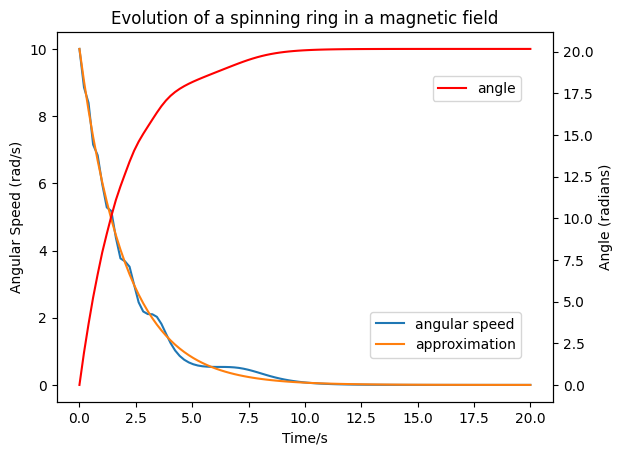

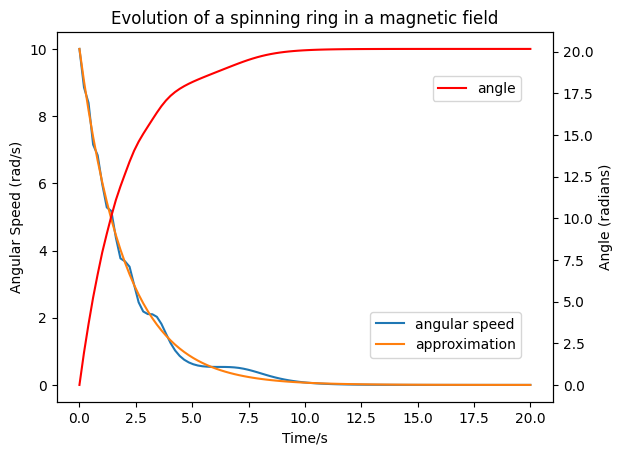

In [118]:
# Sample problem - spinnning ring in magnetic field
import scipy.integrate

def derivatives(t, y, tau):
    return [y[1], -(2.0 / tau) * np.sin(y[0]) ** 2 * y[1]]
solution = scipy.integrate.solve_ivp(fun = derivatives, 
                                     t_span = (0,20),
                                     y0=(0.0, 10.0), 
                                     args=(2.0, ),
                                     t_eval=np.linspace(0, 20, 100))

x, y, dydx = solution.t, solution.y[0], solution.y[1]

# plotting
fig, ax1 = plt.subplots()
ax1.plot(x, dydx, label="angular speed")
ax1.plot(x, 10 * np.exp(-x / 2.0), label="approximation")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Angular Speed (rad/s)")
ax1.set_title("Evolution of a spinning ring in a magnetic field")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))
ax2 = ax1.twinx()  # Use second set of axes for angular position
ax2.plot(x, y, label="angle", color="red")
ax2.set_ylabel("Angle (radians)")
ax2.legend(loc="upper right", bbox_to_anchor=(0.95, 0.9))

fig, ax1 = plt.subplots()
ax1.plot(x, dydx, label="angular speed")
ax1.plot(x, 10 * np.exp(-x / 2.0), label="approximation")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Angular Speed (rad/s)")
ax1.set_title("Evolution of a spinning ring in a magnetic field")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))
ax2 = ax1.twinx()  # Use second set of axes for angular position
ax2.plot(x, y, label="angle", color="red")
ax2.set_ylabel("Angle (radians)")
ax2.legend(loc="upper right", bbox_to_anchor=(0.95, 0.9))

### 4. Fast Fourier Transform O(NlogN)

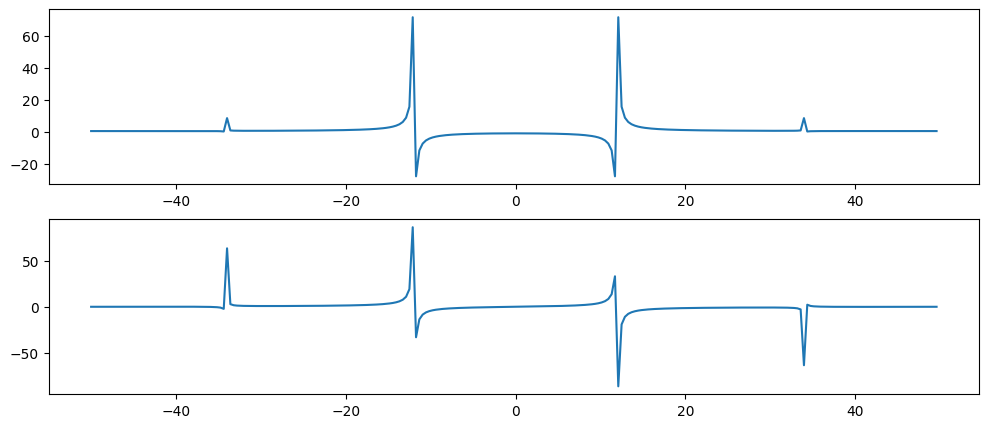

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
dt = 0.01
fftsize = 256 #(2^8)
t = np.arange(fftsize) * dt

#Generate some fake data at 12 Hz and 34 Hz
y = np.cos(2*np.pi*12*t) + 0.5*np.sin(2*np.pi*34*t)
plt.plot(t,y)
Y = np.fft.fft(y) 
f = np.fft.fftfreq(fftsize, dt) 

# plt.subplot(2,1,1) ; plt.plot(abs(Y)) # take ABS as Y is complex
# plt.subplot(2,1,2) ; plt.plot(f, abs(Y))

# plt.subplot(2,1,1); plt.plot(f,Y.real)
# plt.subplot(2,1,2); plt.plot(f,Y.imag)

# Re-ordering the array makes plots tidier 
# fftshift order in monotonically increasing order
### Use fftshift if you want to visualize your result ###
Y2=np.fft.fftshift(Y)
f2=np.fft.fftshift(f)
plt.subplot(2,1,1); plt.plot(f2,Y2.real)
plt.subplot(2,1,2); plt.plot(f2,Y2.imag)



### 5. Monte Carlo Methods

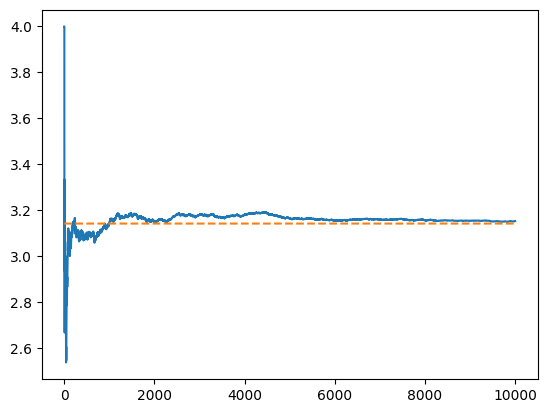

time taken:  0.06035099999999716


In [48]:
import time
import numpy as np
import matplotlib.pyplot as plt

max_samples = 10000
inside = 0
areas = []

tic = time.process_time()
for sample in range(1, max_samples+1):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if x**2 + y**2 < 1:
        inside += 1
    areas.append(inside/sample*4)
toc = time.process_time()

plt.plot(np.arange(1, max_samples + 1), areas)
plt.plot(np.arange(1, max_samples + 1), np.pi * np.ones(max_samples), linestyle='dashed')
plt.show()
print("time taken: ", toc-tic)




In [50]:
from scipy import integrate
integrate.quadrature(np.cos, 0, np.pi / 2)

(0.9999999999999536, 3.9611425250996035e-11)